# Updated EDA and Feature Engineering
- We will try to updated our EDA and Feature engineering process to have better result on our models.

### Import libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import statistics

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### Read the file

In [3]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')


### Data Dictionary

##### Session Information:
`session_ID`: Unique identifier for each charging session.

`User_type, n_private, n_shared`: Type of user (individual or shared).

`Shared_ID`: Identifier for shared charging sessions.

`Start_plugin_hour`: Hour of the day when the charging session started.

`End_plugout_hour`: Hour of the day when the charging session ended.

`El_kWh`: Charged energy per charging session (target variable).
##### Time and Date Information:
`month_plugin`: Month when the charging session started.

`weekdays_plugin`: Day of the week when the charging session started.

`End_plugout_year, End_plugout_month, End_plugout_week, End_plugout_day`: Year, month, week, and day when the 
charging session ended.

`Start_plugin_year, Start_plugin_day, Start_plugin_minute`: Year, day, and minute of the day when the charging session started.

`End_plugout_minute`: Minute of the day when the charging session ended.
##### Weather Information:
- Solar Irradiance Data:

`dhi`: Diffuse horizontal irradiance.

`dni`: Direct normal irradiance.


`ghi`: Global horizontal irradiance.

- Maximum Solar Irradiance:

`max_dhi, max_dni, max_ghi`: Maximum values for diffuse horizontal irradiance, direct normal irradiance, and global horizontal irradiance.

- Temperature-Related Features:

`max_temp`: Maximum temperature.

`max_temp_ts`: Timestamp for the maximum temperature.

`max_uv`: Maximum ultraviolet index.

`min_temp`: Minimum temperature.

`min_temp_ts`: Timestamp for the minimum temperature.

`precip`: Precipitation.

`precip_gpm`: Precipitation in gallons per minute.

`pres`: Atmospheric pressure.

`rh`: Relative humidity.

`slp`: Sea level pressure.

`snow`: Snowfall.

`solar_rad`: Solar radiation.

`t_dhi, t_dni, t_ghi, t_solar_rad`: Temperature-related features for solar irradiance.

`temp`: Temperature.

`ts`: Timestamp for temperature.

`wind_dir`: Wind direction.

`wind_gust_spd`: Wind gust speed.

`wind_spd`: Wind speed.
##### Traffic Density:
`Local traffic density`: Information on local hourly traffic density, which might affect charging behavior.
##### Location Information:
`Garage_ID_...`: Garage IDs where charging sessions took place.
##### User Information:
`User_ID_...`: User IDs associated with different garages.
##### Power Capacity and Flexibility:
`Flex_3_6kW, Flex_7_2kW`: Features related to power capacity and flexibility.
##### AMS and Synthetic Capacity:
`AMS_kWh, Simultaneous_if_3_6kW, Synthetic_3_6kW, Synthetic_7_2kW`: Features related to AMS measurements and synthetic capacity.

Let's run quick simple EDA on our new DataFrame

In [4]:
# lets display all our columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head()


,session_ID,User_type,Shared_ID,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,max_temp_ts,max_uv,max_wind_dir,max_wind_spd,max_wind_spd_ts,min_temp,min_temp_ts,precip,precip_gpm,pres,rh,slp,snow,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd,n_private,Flex_3_6kW,Flex_7_2kW,n_shared,AMS_kWh,Simultaneous_if_3_6kW,Synthetic_3_6kW,Synthetic_7_2kW,Garage_ID_AdA6,Garage_ID_AdO1,Garage_ID_AdO3,Garage_ID_AsO10,Garage_ID_AsO2,Garage_ID_AsO4,Garage_ID_AsO6,Garage_ID_AsO8,Garage_ID_Bl2,Garage_ID_Bl7,Garage_ID_MS1,Garage_ID_MS11,Garage_ID_MS22,Garage_ID_NR1,Garage_ID_Ris,Garage_ID_SR14,Garage_ID_SR2,Garage_ID_SR4,Garage_ID_UT1,Garage_ID_UT15,Garage_ID_UT2,Garage_ID_UT7,Garage_ID_UT9,User_ID_AdA6-1,User_ID_AdO1-1,User_ID_AdO1-2,User_ID_AdO1-3,User_ID_AdO1-4,User_ID_AdO3-1,User_ID_AdO3-2,User_ID_AdO3-3,User_ID_AdO3-4,User_ID_AsO10-1,User_ID_AsO10-2,User_ID_AsO10-3,User_ID_AsO10-4,User_ID_AsO10-5,User_ID_AsO2-1,User_ID_AsO4-1,User_ID_AsO4-2,User_ID_AsO4-3,User_ID_AsO6-1,User_ID_AsO8-1,User_ID_AsO8-2,User_ID_AsO8-3,User_ID_AsO8-4,User_ID_Bl2-1,User_ID_Bl2-2,User_ID_Bl2-3,User_ID_Bl2-4,User_ID_Bl2-5,User_ID_Bl2-6,User_ID_Bl2-7,User_ID_Bl2-8,User_ID_Bl7-1,User_ID_MS1-1,User_ID_MS1-2,User_ID_MS11-1,User_ID_MS22-1,User_ID_NR1-1,User_ID_NR1-2,User_ID_NR1-3,User_ID_Ris-1,User_ID_Ris-2,User_ID_Ris-3,User_ID_SR14-1,User_ID_SR14-2,User_ID_SR2-1,User_ID_SR2-2,User_ID_SR2-3,User_ID_SR4-1,User_ID_Share-1,User_ID_Share-10,User_ID_Share-11,User_ID_Share-12,User_ID_Share-13,User_ID_Share-14,User_ID_Share-15,User_ID_Share-16,User_ID_Share-17,User_ID_Share-18,User_ID_Share-19,User_ID_Share-2,User_ID_Share-20,User_ID_Share-21,User_ID_Share-22,User_ID_Share-23,User_ID_Share-24,User_ID_Share-25,User_ID_Share-26,User_ID_Share-27,User_ID_Share-28,User_ID_Share-29,User_ID_Share-3,User_ID_Share-30,User_ID_Share-31,User_ID_Share-32,User_ID_Share-33,User_ID_Share-34,User_ID_Share-35,User_ID_Share-36,User_ID_Share-37,User_ID_Share-38,User_ID_Share-39,User_ID_Share-4,User_ID_Share-5,User_ID_Share-6,User_ID_Share-7,User_ID_Share-8,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5,End_plugout_year,End_plugout_month,End_plugout_week,End_plugout_day,End_plugout_minute,Start_plugin_year,Start_plugin_day,Start_plugin_minute
0,1,1,5418,10,10.0,3.0,5.000000e+00,12,5,5,1.0,3244,1632,545,194,622,55,-6.7,3,23,3,26,201,28,2.9,1545346800,0.6,176,4.0,1545429600,-1.8,1545429600,0.0,0.0,994,62.7,1010,0.0,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4,45.0,16.211,35.25,21.0,5.45,2.0,1.74,3.24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,12,4,21,23,2018,21,0
1,2,1,5418,10,10.0,87.0,1.366667e+08,12,5,5,1.0,3244,1632,545,194,622,55,-6.7,3,23,3,26,201,28,2.9,1545346800,0.6,176,4.0,1545429600,-1.8,1545429600,0.0,0.0,994,62.7,1010,0.0,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4,45.0,16.211,35.25,21.0,5.45,2.0,1.74,3.24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,12,4,21,32,2018,21,0
2,3,1,5418,11,19.0,2987.0,8.216389e+09,12,5,5,7.0,3605,1691,605,230,771,55,-6.7,3,23,3,26,201,28,2.9,1545346800,0.6,176,4.0,1545429600,-1.8,1545429600,0.0,0.0,994,62.7,1010,0.0,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4,45.0,16.211,35.25,21.0,5.45,2.0,1.74,3.24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
df.shape

(6866, 183)

Text(0.5, 1.02, 'Distribution of Variables')

<Axes: xlabel='session_ID', ylabel='Count'>

Text(0.5, 1.0, 'session_ID')

Text(0.5, 0, '')

<Axes: xlabel='User_type', ylabel='Count'>

Text(0.5, 1.0, 'User_type')

Text(0.5, 0, '')

<Axes: xlabel='Shared_ID', ylabel='Count'>

Text(0.5, 1.0, 'Shared_ID')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_hour', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_hour')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_hour', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_hour')

Text(0.5, 0, '')

<Axes: xlabel='El_kWh', ylabel='Count'>

Text(0.5, 1.0, 'El_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Duration_hours', ylabel='Count'>

Text(0.5, 1.0, 'Duration_hours')

Text(0.5, 0, '')

<Axes: xlabel='month_plugin', ylabel='Count'>

Text(0.5, 1.0, 'month_plugin')

Text(0.5, 0, '')

<Axes: xlabel='weekdays_plugin', ylabel='Count'>

Text(0.5, 1.0, 'weekdays_plugin')

Text(0.5, 0, '')

<Axes: xlabel='Plugin_category', ylabel='Count'>

Text(0.5, 1.0, 'Plugin_category')

Text(0.5, 0, '')

<Axes: xlabel='Duration_category', ylabel='Count'>

Text(0.5, 1.0, 'Duration_category')

Text(0.5, 0, '')

<Axes: xlabel='KROPPAN BRU', ylabel='Count'>

Text(0.5, 1.0, 'KROPPAN BRU')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLTLIA', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLTLIA')

Text(0.5, 0, '')

<Axes: xlabel='SELSBAKK', ylabel='Count'>

Text(0.5, 1.0, 'SELSBAKK')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLT RAMPE 2', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLT RAMPE 2')

Text(0.5, 0, '')

<Axes: xlabel='Jonsvannsveien vest for Steinanvegen', ylabel='Count'>

Text(0.5, 1.0, 'Jonsvannsveien vest for Steinanvegen')

Text(0.5, 0, '')

<Axes: xlabel='clouds', ylabel='Count'>

Text(0.5, 1.0, 'clouds')

Text(0.5, 0, '')

<Axes: xlabel='dewpt', ylabel='Count'>

Text(0.5, 1.0, 'dewpt')

Text(0.5, 0, '')

<Axes: xlabel='dhi', ylabel='Count'>

Text(0.5, 1.0, 'dhi')

Text(0.5, 0, '')

<Axes: xlabel='dni', ylabel='Count'>

Text(0.5, 1.0, 'dni')

Text(0.5, 0, '')

<Axes: xlabel='ghi', ylabel='Count'>

Text(0.5, 1.0, 'ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_dhi', ylabel='Count'>

Text(0.5, 1.0, 'max_dhi')

Text(0.5, 0, '')

<Axes: xlabel='max_dni', ylabel='Count'>

Text(0.5, 1.0, 'max_dni')

Text(0.5, 0, '')

<Axes: xlabel='max_ghi', ylabel='Count'>

Text(0.5, 1.0, 'max_ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_temp', ylabel='Count'>

Text(0.5, 1.0, 'max_temp')

Text(0.5, 0, '')

<Axes: xlabel='max_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='max_uv', ylabel='Count'>

Text(0.5, 1.0, 'max_uv')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd_ts')

Text(0.5, 0, '')

<Axes: xlabel='min_temp', ylabel='Count'>

Text(0.5, 1.0, 'min_temp')

Text(0.5, 0, '')

<Axes: xlabel='min_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'min_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='precip', ylabel='Count'>

Text(0.5, 1.0, 'precip')

Text(0.5, 0, '')

<Axes: xlabel='precip_gpm', ylabel='Count'>

Text(0.5, 1.0, 'precip_gpm')

Text(0.5, 0, '')

<Axes: xlabel='pres', ylabel='Count'>

Text(0.5, 1.0, 'pres')

Text(0.5, 0, '')

<Axes: xlabel='rh', ylabel='Count'>

Text(0.5, 1.0, 'rh')

Text(0.5, 0, '')

<Axes: xlabel='slp', ylabel='Count'>

Text(0.5, 1.0, 'slp')

Text(0.5, 0, '')

<Axes: xlabel='snow', ylabel='Count'>

Text(0.5, 1.0, 'snow')

Text(0.5, 0, '')

<Axes: xlabel='solar_rad', ylabel='Count'>

Text(0.5, 1.0, 'solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='t_dhi', ylabel='Count'>

Text(0.5, 1.0, 't_dhi')

Text(0.5, 0, '')

<Axes: xlabel='t_dni', ylabel='Count'>

Text(0.5, 1.0, 't_dni')

Text(0.5, 0, '')

<Axes: xlabel='t_ghi', ylabel='Count'>

Text(0.5, 1.0, 't_ghi')

Text(0.5, 0, '')

<Axes: xlabel='t_solar_rad', ylabel='Count'>

Text(0.5, 1.0, 't_solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='temp', ylabel='Count'>

Text(0.5, 1.0, 'temp')

Text(0.5, 0, '')

<Axes: xlabel='ts', ylabel='Count'>

Text(0.5, 1.0, 'ts')

Text(0.5, 0, '')

<Axes: xlabel='wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='wind_gust_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_gust_spd')

Text(0.5, 0, '')

<Axes: xlabel='wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='n_private', ylabel='Count'>

Text(0.5, 1.0, 'n_private')

Text(0.5, 0, '')

<Axes: xlabel='Flex_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Flex_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='n_shared', ylabel='Count'>

Text(0.5, 1.0, 'n_shared')

Text(0.5, 0, '')

<Axes: xlabel='AMS_kWh', ylabel='Count'>

Text(0.5, 1.0, 'AMS_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Simultaneous_if_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Simultaneous_if_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdA6', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdA6')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdO1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdO1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdO3', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdO3')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO10', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO10')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO4', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO4')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO6', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO6')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO8', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO8')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Bl2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Bl2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Bl7', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Bl7')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS11', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS11')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS22', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS22')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_NR1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_NR1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Ris', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Ris')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR14', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR14')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR4', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR4')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT15', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT15')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT7', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT7')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT9', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT9')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdA6-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdA6-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO6-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO6-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-6', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-6')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-7', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-7')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-8', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-8')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl7-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl7-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS11-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS11-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS22-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS22-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR14-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR14-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR14-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR14-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR4-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR4-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-10', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-10')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-11', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-11')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-12', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-12')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-13', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-13')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-14', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-14')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-15', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-15')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-16', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-16')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-17', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-17')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-18', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-18')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-19', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-19')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-20', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-20')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-21', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-21')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-22', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-22')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-23', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-23')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-24', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-24')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-25', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-25')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-26', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-26')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-27', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-27')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-28', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-28')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-29', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-29')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-30', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-30')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-31', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-31')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-32', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-32')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-33', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-33')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-34', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-34')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-35', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-35')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-36', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-36')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-37', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-37')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-38', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-38')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-39', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-39')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-6', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-6')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-7', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-7')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-8', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-8')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-9', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-9')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT15-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT15-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT15-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT15-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-5')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_year', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_year')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_month', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_month')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_week', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_week')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_day', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_day')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_minute', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_minute')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_year', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_year')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_day', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_day')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_minute', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_minute')

Text(0.5, 0, '')

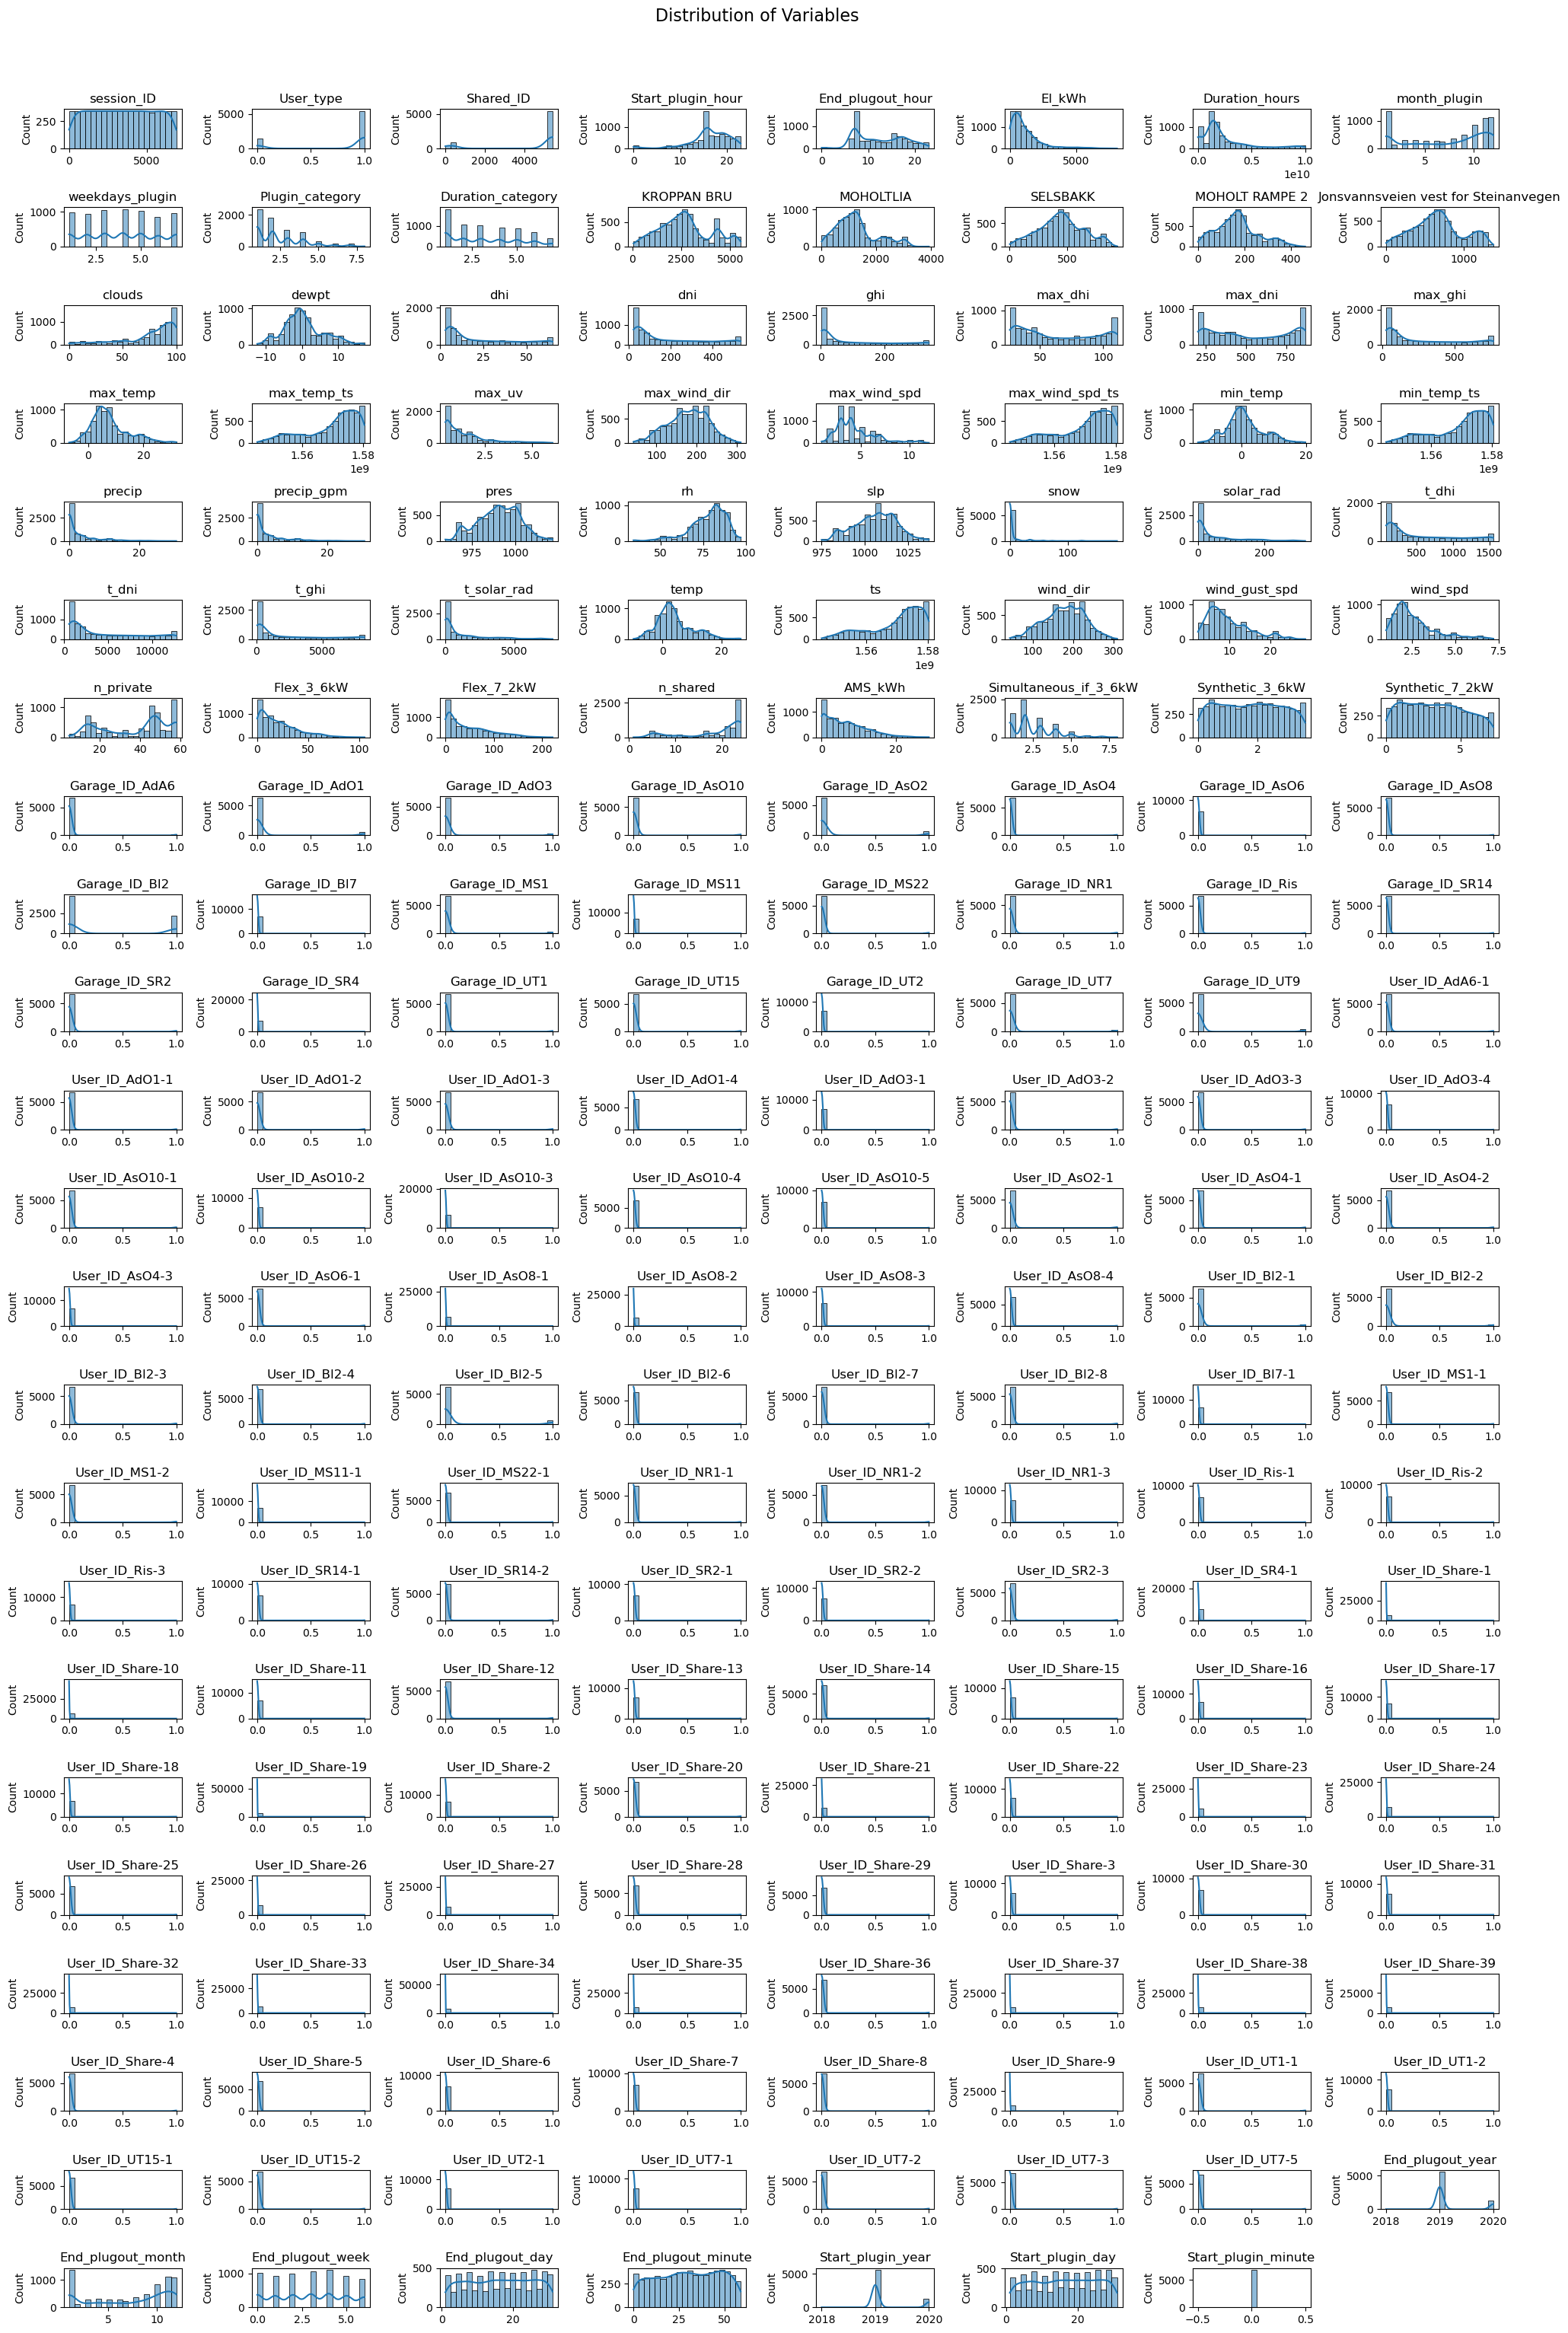

In [6]:
num_features = df.shape[1]
num_cols = 8  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle("Distribution of Variables", y=1.02, fontsize=16)

# Flatten the axes if there's only one row
axes = axes.flatten()

# Iterate through the features and create histograms
for i in range(num_features):
    if i < num_features:
        sns.histplot(df.iloc[:, i], ax=axes[i], bins=20, kde=True)  # Using seaborn for better visualizations
        axes[i].set_title(df.columns[i])
        axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Remove empty subplots if any
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.show()


We can have a better visual if we will exclude any columns with `Garage_ID and User_ID` prefixes, as distribution of this columns are not usefull, as they are dummy variables.

Text(0.5, 1.02, "Distribution of Variables (Excluding 'Garage_ID' and 'User_ID')")

<Axes: xlabel='session_ID', ylabel='Count'>

Text(0.5, 1.0, 'session_ID')

Text(0.5, 0, '')

<Axes: xlabel='User_type', ylabel='Count'>

Text(0.5, 1.0, 'User_type')

Text(0.5, 0, '')

<Axes: xlabel='Shared_ID', ylabel='Count'>

Text(0.5, 1.0, 'Shared_ID')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_hour', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_hour')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_hour', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_hour')

Text(0.5, 0, '')

<Axes: xlabel='El_kWh', ylabel='Count'>

Text(0.5, 1.0, 'El_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Duration_hours', ylabel='Count'>

Text(0.5, 1.0, 'Duration_hours')

Text(0.5, 0, '')

<Axes: xlabel='month_plugin', ylabel='Count'>

Text(0.5, 1.0, 'month_plugin')

Text(0.5, 0, '')

<Axes: xlabel='weekdays_plugin', ylabel='Count'>

Text(0.5, 1.0, 'weekdays_plugin')

Text(0.5, 0, '')

<Axes: xlabel='Plugin_category', ylabel='Count'>

Text(0.5, 1.0, 'Plugin_category')

Text(0.5, 0, '')

<Axes: xlabel='Duration_category', ylabel='Count'>

Text(0.5, 1.0, 'Duration_category')

Text(0.5, 0, '')

<Axes: xlabel='KROPPAN BRU', ylabel='Count'>

Text(0.5, 1.0, 'KROPPAN BRU')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLTLIA', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLTLIA')

Text(0.5, 0, '')

<Axes: xlabel='SELSBAKK', ylabel='Count'>

Text(0.5, 1.0, 'SELSBAKK')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLT RAMPE 2', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLT RAMPE 2')

Text(0.5, 0, '')

<Axes: xlabel='Jonsvannsveien vest for Steinanvegen', ylabel='Count'>

Text(0.5, 1.0, 'Jonsvannsveien vest for Steinanvegen')

Text(0.5, 0, '')

<Axes: xlabel='clouds', ylabel='Count'>

Text(0.5, 1.0, 'clouds')

Text(0.5, 0, '')

<Axes: xlabel='dewpt', ylabel='Count'>

Text(0.5, 1.0, 'dewpt')

Text(0.5, 0, '')

<Axes: xlabel='dhi', ylabel='Count'>

Text(0.5, 1.0, 'dhi')

Text(0.5, 0, '')

<Axes: xlabel='dni', ylabel='Count'>

Text(0.5, 1.0, 'dni')

Text(0.5, 0, '')

<Axes: xlabel='ghi', ylabel='Count'>

Text(0.5, 1.0, 'ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_dhi', ylabel='Count'>

Text(0.5, 1.0, 'max_dhi')

Text(0.5, 0, '')

<Axes: xlabel='max_dni', ylabel='Count'>

Text(0.5, 1.0, 'max_dni')

Text(0.5, 0, '')

<Axes: xlabel='max_ghi', ylabel='Count'>

Text(0.5, 1.0, 'max_ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_temp', ylabel='Count'>

Text(0.5, 1.0, 'max_temp')

Text(0.5, 0, '')

<Axes: xlabel='max_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='max_uv', ylabel='Count'>

Text(0.5, 1.0, 'max_uv')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd_ts')

Text(0.5, 0, '')

<Axes: xlabel='min_temp', ylabel='Count'>

Text(0.5, 1.0, 'min_temp')

Text(0.5, 0, '')

<Axes: xlabel='min_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'min_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='precip', ylabel='Count'>

Text(0.5, 1.0, 'precip')

Text(0.5, 0, '')

<Axes: xlabel='precip_gpm', ylabel='Count'>

Text(0.5, 1.0, 'precip_gpm')

Text(0.5, 0, '')

<Axes: xlabel='pres', ylabel='Count'>

Text(0.5, 1.0, 'pres')

Text(0.5, 0, '')

<Axes: xlabel='rh', ylabel='Count'>

Text(0.5, 1.0, 'rh')

Text(0.5, 0, '')

<Axes: xlabel='slp', ylabel='Count'>

Text(0.5, 1.0, 'slp')

Text(0.5, 0, '')

<Axes: xlabel='snow', ylabel='Count'>

Text(0.5, 1.0, 'snow')

Text(0.5, 0, '')

<Axes: xlabel='solar_rad', ylabel='Count'>

Text(0.5, 1.0, 'solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='t_dhi', ylabel='Count'>

Text(0.5, 1.0, 't_dhi')

Text(0.5, 0, '')

<Axes: xlabel='t_dni', ylabel='Count'>

Text(0.5, 1.0, 't_dni')

Text(0.5, 0, '')

<Axes: xlabel='t_ghi', ylabel='Count'>

Text(0.5, 1.0, 't_ghi')

Text(0.5, 0, '')

<Axes: xlabel='t_solar_rad', ylabel='Count'>

Text(0.5, 1.0, 't_solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='temp', ylabel='Count'>

Text(0.5, 1.0, 'temp')

Text(0.5, 0, '')

<Axes: xlabel='ts', ylabel='Count'>

Text(0.5, 1.0, 'ts')

Text(0.5, 0, '')

<Axes: xlabel='wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='wind_gust_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_gust_spd')

Text(0.5, 0, '')

<Axes: xlabel='wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='n_private', ylabel='Count'>

Text(0.5, 1.0, 'n_private')

Text(0.5, 0, '')

<Axes: xlabel='Flex_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Flex_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='n_shared', ylabel='Count'>

Text(0.5, 1.0, 'n_shared')

Text(0.5, 0, '')

<Axes: xlabel='AMS_kWh', ylabel='Count'>

Text(0.5, 1.0, 'AMS_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Simultaneous_if_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Simultaneous_if_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_year', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_year')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_month', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_month')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_week', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_week')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_day', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_day')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_minute', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_minute')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_year', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_year')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_day', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_day')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_minute', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_minute')

Text(0.5, 0, '')

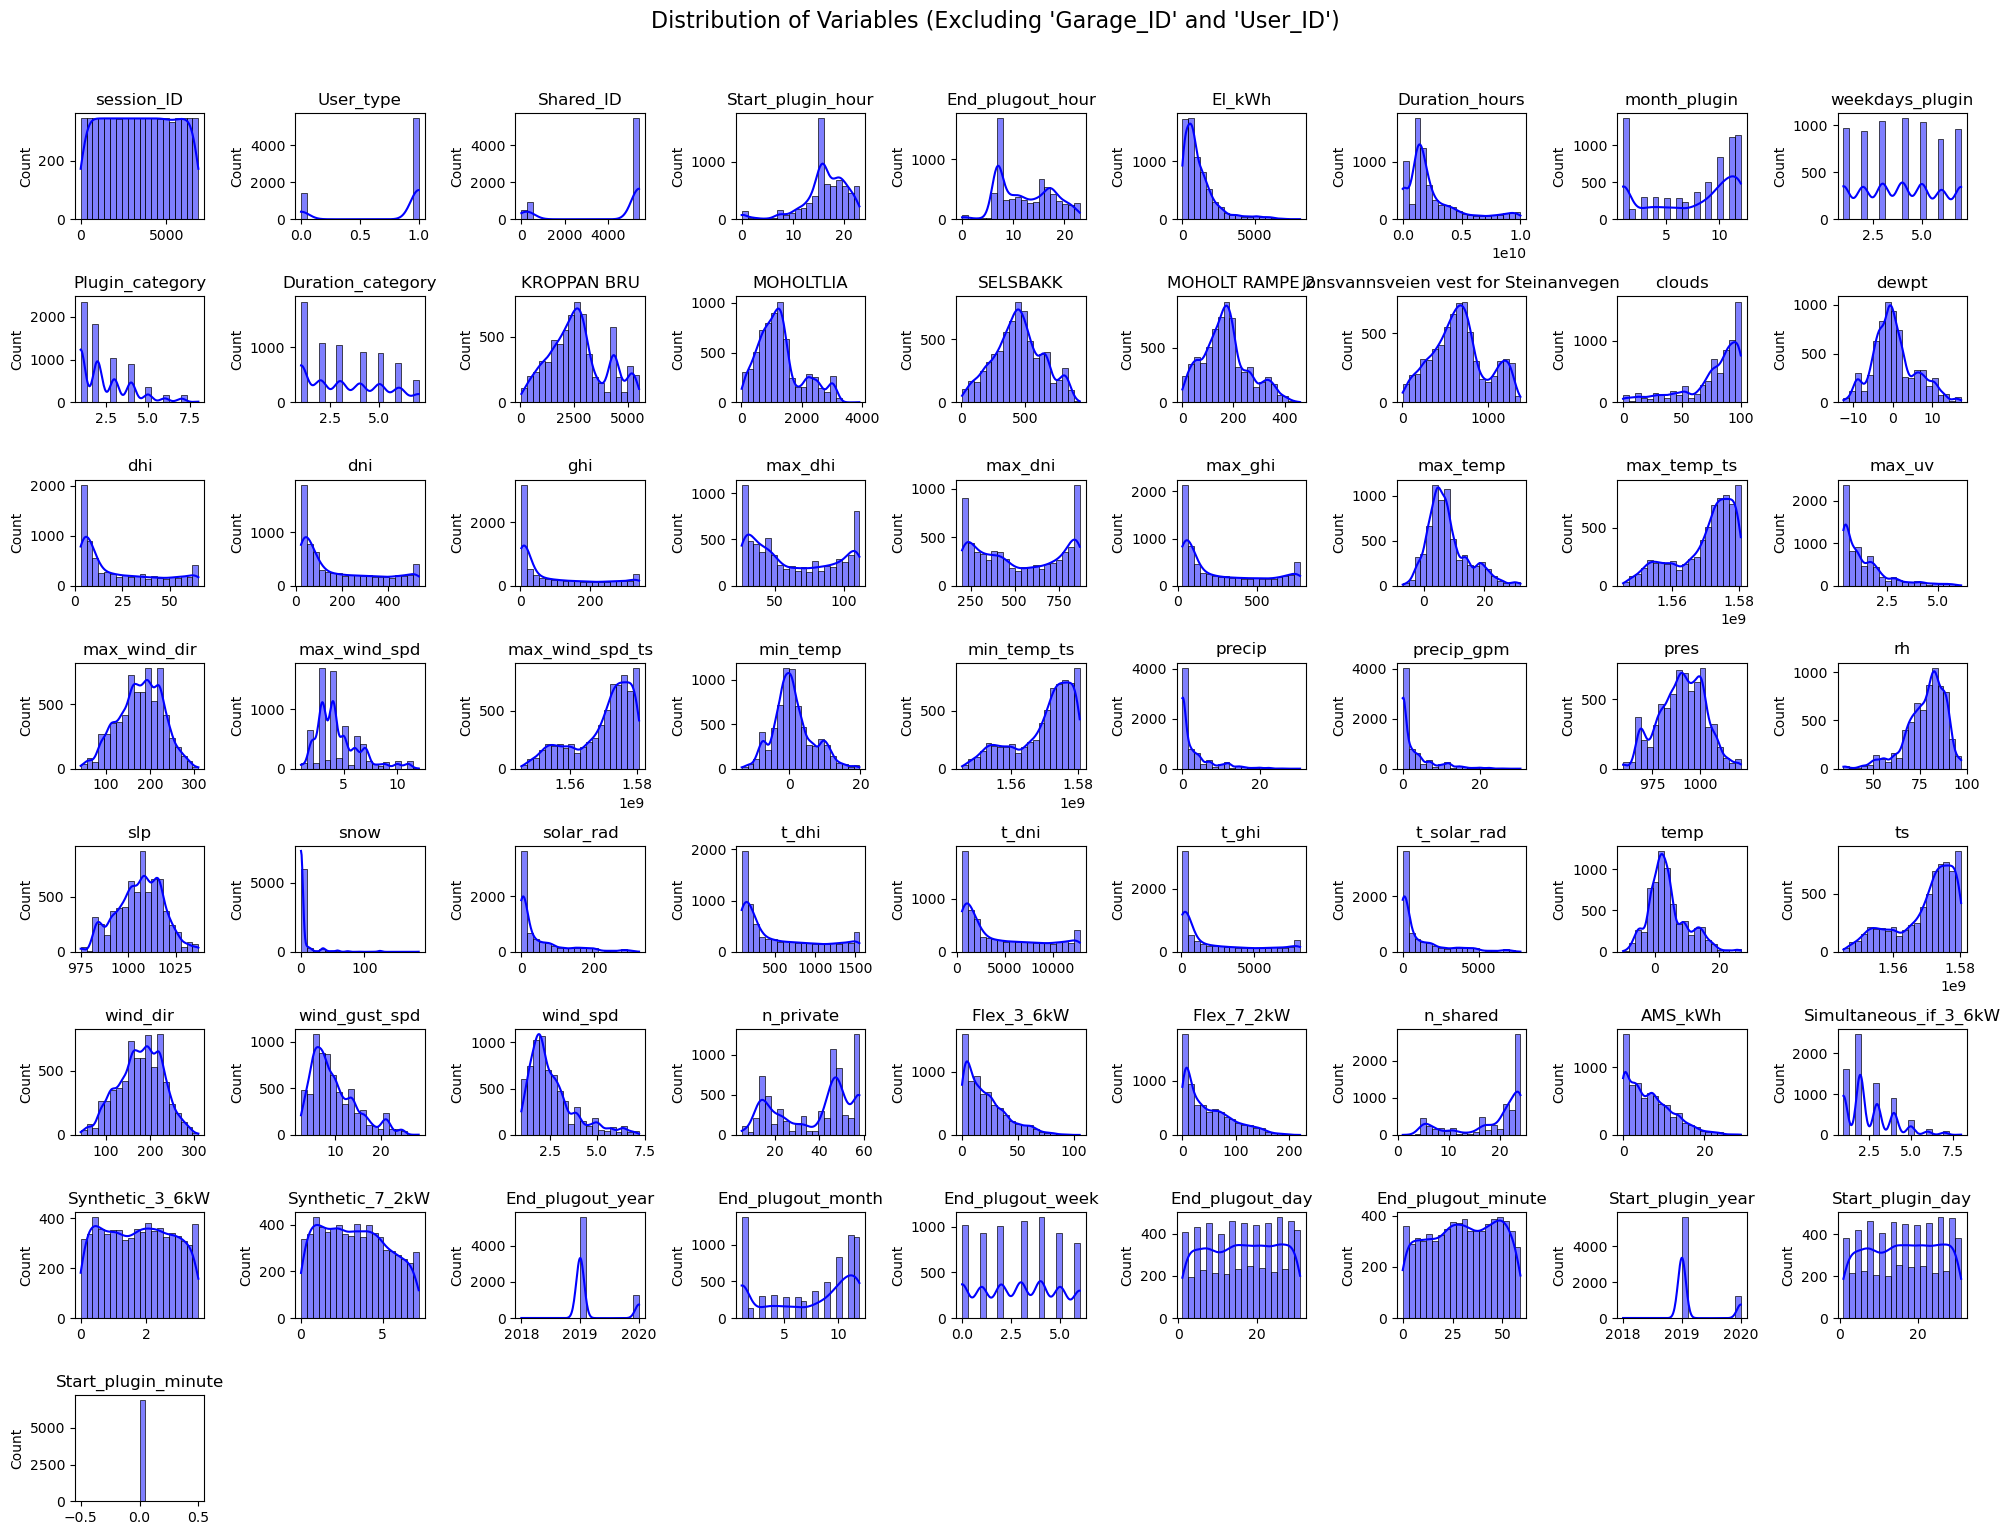

In [7]:
# Get the features excluding those with prefixes 'Garage_ID' and 'User_ID'
selected_features = [col for col in df.columns if not col.startswith(('Garage_ID', 'User_ID'))]

num_features = len(selected_features)
num_cols = 9  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.suptitle("Distribution of Variables (Excluding 'Garage_ID' and 'User_ID')", y=1.02, fontsize=16)

# Flatten the axes if there's only one row
axes = axes.flatten()

# Iterate through the features and create histograms
for i in range(num_features):
    sns.histplot(df[selected_features[i]], ax=axes[i], bins=20, kde=True, color='blue')  # Using seaborn for better visualizations
    axes[i].set_title(selected_features[i])
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Remove empty subplots if any
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.show()


After analyzing the dataset, it becomes evident that features such as El_kWh and Duration_hours exhibit a right-skewed distribution. This skewness is expected since, in the context of charging electric cars, we anticipate a higher frequency of shorter charging sessions with lower energy consumption. Pludin_category and Duration_category als will be related, as y=theu represent Duration_hours.

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Duration_hours vs. El_kWh')

Text(0.5, 0, 'Duration_hours')

Text(0, 0.5, 'El_kWh')

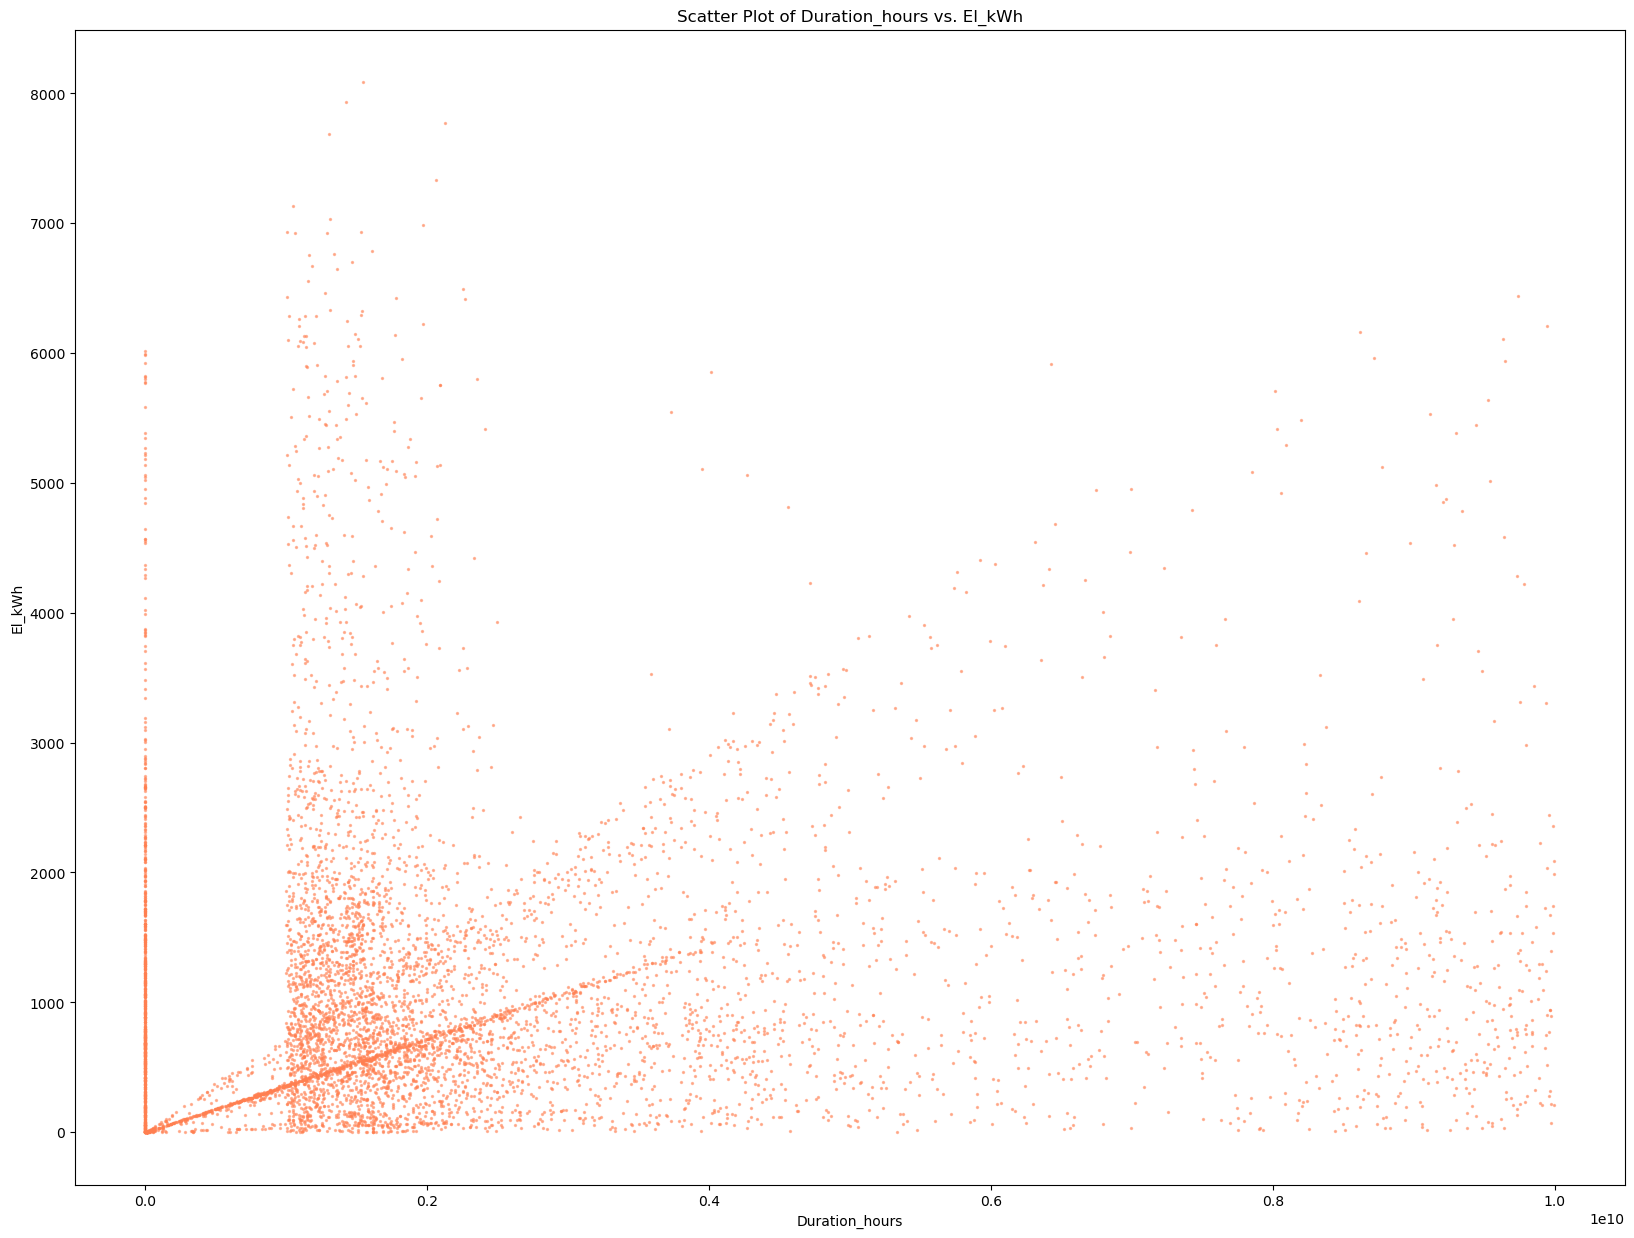

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Duration_hours' and 'El_kWh'
plt.figure(figsize=(20, 15))
plt.scatter(df['Duration_hours'], df['El_kWh'], alpha=0.5, s=2, color='coral')  
plt.title('Scatter Plot of Duration_hours vs. El_kWh')
plt.xlabel('Duration_hours')
plt.ylabel('El_kWh')
plt.show()


#### Observation
- People tend to spend less time to charge their car.
- We have 2 columns: `n_private and n_shared` that represent same as `User_type`. 
- `session_ID` could be same as our index, as it represent each charging session.

In [9]:
df['session_ID'].value_counts()

session_ID
1       1
4587    1
4585    1
4584    1
4583    1
       ..
2286    1
2285    1
2284    1
2283    1
6878    1
Name: count, Length: 6866, dtype: int64

Doesn't provide any valuable information. Will be dropped

In [10]:
# Checking value
df[['User_type', 'n_private', 'n_shared']].value_counts()

User_type  n_private  n_shared
1          58.0       24.0        1063
           49.0       23.0         315
                      24.0         249
           13.0       6.0          203
0          58.0       24.0         191
                                  ... 
           10.0       5.0            3
           23.0       18.0           2
           17.0       12.0           2
           21.0       16.0           1
           5.0        1.0            1
Name: count, Length: 148, dtype: int64

We can see that value of `User_type` is not `informative` as `n_private` and `n_shared`. Will be dropped

Let's drop columns that we defined

In [11]:
df.drop(['session_ID', 'User_type'], axis=1, inplace=True)
#Sanity check
df.shape

(6866, 181)

#### Let's save our updated DataFrame

In [12]:
# Saving our DataFrame
df.to_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean2.csv', index=False)

##### Now we can try Baseline models and compare it to our result from `Final_modeling notebook`

In [13]:
# Preparing our data for a machine learning model
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [14]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(verbose=-1),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []

}

# Evaluate each model without scaling using the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)

    train_score = model.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Train Score'].append(train_score)


# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

LinearRegression()

               Model            MSE        RMSE         MAE  R2 Score  \
0      Random Forest  507508.632090  712.396401  421.934193  0.592915   
1               LGBM  592657.115085  769.842266  480.444950  0.524615   
2            XGBoost  589629.663827  767.873469  467.263852  0.527044   
3  Gradient Boosting  602977.171072  776.516047  505.438024  0.516337   
4  Linear Regression  647699.431017  804.797758  519.281227  0.480465   

   Train Score  
0     0.942923  
1     0.832452  
2     0.945228  
3     0.620042  
4     0.559480  


Let's compare it to our past results from Final_modeling notebook

Model            MSE        RMSE         MAE  R2 Score

0      Random Forest  496462.462821  704.600925  417.498580  0.601775   
1               LGBM  586114.066370  765.580869  475.685254  0.529864   
2            XGBoost  585375.885677  765.098612  466.196530  0.530456   
3  Gradient Boosting  607405.728619  779.362386  505.889100  0.512785   
4  Linear Regression  648813.926653  805.489868  519.927619  0.479571   

   Train Score  
0     0.942022  
1     0.829947  
2     0.944386  
3     0.618850  
4     0.559673  
New Metric result's slightly better compare to Final_Modeling notebook results on Baseline models. Only Random Forest results slightly lower.

In [15]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(X_validation)

# Calculate metrics
train_score = best_model.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  507558.948833  712.431715  420.998887  0.592875   

   Train Score  
0     0.700203  


In [16]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Metrics:")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R2 Score: {test_r2}")
print(f"\nTrain Score: {train_score}")


Test Metrics:
MSE: 513455.8307781278
RMSE: 716.5583233611399
MAE: 438.52771852935393
R2 Score: 0.610750051302313

Train Score: 0.7002027170738614


In [18]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__learning_rate': [0.05],
    'model__max_depth': [None],
    'model__min_samples_split': [45],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.05],
                         'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [45],
                         'model__n_estimators': [25]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  545336.826064  738.469245  484.327454   

   R2 Score  Train Score  
0  0.562572     0.697414  
Best Hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 45, 'model__n_estimators': 25}


In [19]:
# Make predictions on the test set
y_test_pred = best_model_gb.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Metrics:")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R2 Score: {test_r2}")
print(f"\nTrain Score: {train_score}")


Test Metrics:
MSE: 550439.908770639
RMSE: 741.916375860945
MAE: 490.60590415268763
R2 Score: 0.5827124877997242

Train Score: 0.6974142994938739


Let's compare it to Final_modeling notebook 
- Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 
                       'model__n_estimators': 25}
- Model: Random Forest (Tuned)  MSE: 548207.240773  RMSE: 740.410184  MAE: 448.569659  R2 Score: 0.602464   Train Score: 0.720435  

And again, Results lower compare to Final_modeling notebook

## Model with Isolation Forest outlier remover

In [33]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')

In [21]:
df.shape

(6866, 183)

In [22]:
from sklearn.ensemble import IsolationForest

# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df['outlier'] = outlier_detector.fit_predict(df[['El_kWh', 'Duration_hours']])

# Removing outliers
df = df[df['outlier'] != -1]

df.drop(['outlier'], axis=1, inplace=True)


In [23]:
# Preparing our data for a machine learning model
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

##### Baseline models

In [24]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(verbose=-1),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []

}

# Evaluate each model without scaling using the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)

    train_score = model.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)  # Append R2 Score
    metrics['Train Score'].append(train_score)


# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

LinearRegression()

               Model            MSE        RMSE         MAE  R2 Score  \
0      Random Forest  397434.523640  630.424082  394.906916  0.469212   
1               LGBM  408186.560901  638.894796  418.567600  0.454853   
2            XGBoost  426374.535422  652.973610  419.524835  0.430562   
3  Gradient Boosting  422185.838740  649.758293  436.600541  0.436156   
4  Linear Regression  448328.854156  669.573636  453.526627  0.401241   

   Train Score  
0     0.932116  
1     0.812319  
2     0.933957  
3     0.591375  
4     0.507257  


Let's compare it to our past results from Final_modeling notebook

Model            MSE        RMSE         MAE  R2 Score

0      Random Forest  496462.462821  704.600925  417.498580  0.601775   
1               LGBM  586114.066370  765.580869  475.685254  0.529864   
2            XGBoost  585375.885677  765.098612  466.196530  0.530456   
3  Gradient Boosting  607405.728619  779.362386  505.889100  0.512785   
4  Linear Regression  648813.926653  805.489868  519.927619  0.479571   

   Train Score  
0     0.942022  
1     0.829947  
2     0.944386  
3     0.618850  
4     0.559673  
New Metric result's slightly lower compare to Final_Modeling notebook results on Baseline models.

##### Random Forest with MinMax Scaler

In [25]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(X_validation)

# Calculate metrics
train_score = best_model.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  387376.330961  622.395639  394.986778  0.482645   

   Train Score  
0     0.667971  


##### Random Forest with Standart Scaler

In [26]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
standart_scaler = StandardScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', standart_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(X_validation)

# Calculate metrics
train_score = best_model.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  387516.522817  622.508251  395.108723  0.482458   

   Train Score  
0     0.667989  


##### Random Forest with no Scaler

In [27]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model.predict(X_validation)

# Calculate metrics
train_score = best_model.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  387495.844574  622.491642  395.100116  0.482486   

   Train Score  
0     0.667883  


In [28]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Metrics:")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R2 Score: {test_r2}")
print(f"\nTrain Score: {train_score}")


Test Metrics:
MSE: 358595.8013860992
RMSE: 598.8286911847988
MAE: 393.59932296768335
R2 Score: 0.5097240727944442

Train Score: 0.6678825566897117


##### Conclusion: 
We still have Random Forest models resul best so far.

## Isolation forest with Scaling features we choosed for detecting outliers.

In [29]:
from sklearn.ensemble import IsolationForest

# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df['outlier'] = outlier_detector.fit_predict(df[['El_kWh', 'Duration_hours']])

# Removing outliers
df = df[df['outlier'] != -1]

df.drop(['outlier'], axis=1, inplace=True)

# Feature Scaling
scaler = StandardScaler()
df[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df[['El_kWh', 'Duration_hours']])

In [30]:
# Preparing our data for a machine learning model
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [31]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(verbose=-1),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []

}

# Evaluate each model without scaling using the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)

    train_score = model.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)  # Append R2 Score
    metrics['Train Score'].append(train_score)


# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

LinearRegression()

               Model       MSE      RMSE       MAE  R2 Score  Train Score
0      Random Forest  0.514713  0.717435  0.469076  0.511575     0.928525
1               LGBM  0.549382  0.741203  0.503691  0.478677     0.804363
2            XGBoost  0.542767  0.736728  0.497193  0.484953     0.929405
3  Gradient Boosting  0.585650  0.765277  0.537952  0.444261     0.570240
4  Linear Regression  0.623353  0.789527  0.557734  0.408484     0.495847


Worst traing to boost this idea. We will Stop with Random Forest Regression From `Final_modeling notebook`